In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('/content/drive/MyDrive/haberman.csv')
df

## OBSERVATION:
#AGE: patients age at time of operation
#YEAR: patients year at the time of operation
#NODES: number of positive axilliary node present
#STATUS:
#there are two numeric value 1 and 2
#1- it represent patients survive 5 years or more than 5 years
#2- it represent patients died within 5 years

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [8]:
# remove rows if they are contains null value
df.dropna()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [9]:
#for better understanding of column of status replaced 
# 1 into survive and 2 into died

df['status']= df['status'].replace(1,'survive').replace(2,'died')
df.head(10)

,age,year,nodes,status
0,30,64,1,survive
1,30,62,3,survive
2,30,65,0,survive
3,31,59,2,survive
4,31,65,4,survive
5,33,58,10,survive
6,33,60,0,survive
7,34,59,0,died
8,34,66,9,died
9,34,58,30,survive


In [11]:
df.tail(10)

# it gives bottom 10 rows

,age,year,nodes,status
296,72,67,3,survive
297,73,62,0,survive
298,73,68,0,survive
299,74,65,3,died
300,74,63,0,survive
301,75,62,1,survive
302,76,67,0,survive
303,77,65,3,survive
304,78,65,1,died
305,83,58,2,died


In [12]:
df.shape

(306, 4)

In [13]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [15]:
df['status'].value_counts()

## observation:
# - df is imbalanced dataset because column(status) contains two type value(survive,died) which are unequl in number as survived contain 225 and died contain 81.

survive    225
died        81
Name: status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


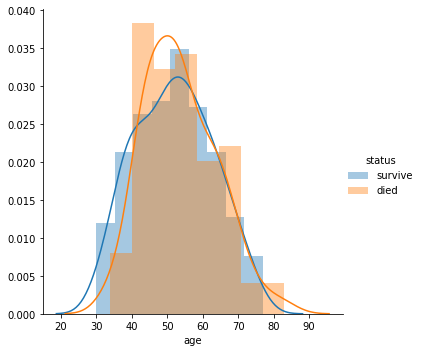

In [19]:
# UNIVARIATE ANALYSIS:

### 1.Distribution plot:

sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'age').add_legend()

## observation:
#patients age of 30 to 34 survived more than 5 years
#patients age of 77 to 82 died within 5 year
#and except above age we can't conclude any things because of much overlapping in graph

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


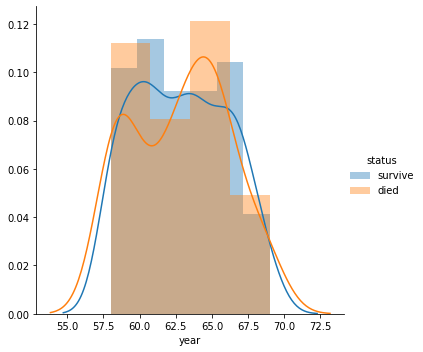

In [20]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'year').add_legend()

## observation:
#from the graph we can't conclude any thing because of much overlapping.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


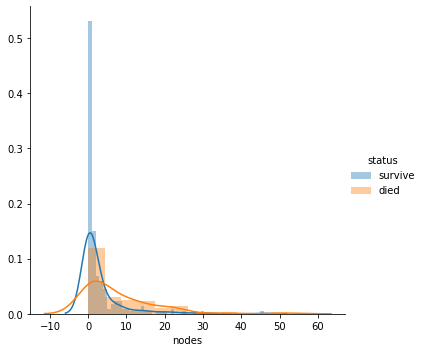

In [21]:
sns.FacetGrid(df,hue='status', height=5).map(sns.distplot,'nodes').add_legend()

## observation:
#from the graph we conclude that the patients with less number of nodes will survived more than 5 years. hence nodes playing a good role in classifying the survival status of patients in comparison of AGE and YEAR.

In [22]:
###  PDF AND CDF:

survive_df=df.loc[df['status']=='survive']

died_df=df.loc[df['status']=='died']



pdf: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bin: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


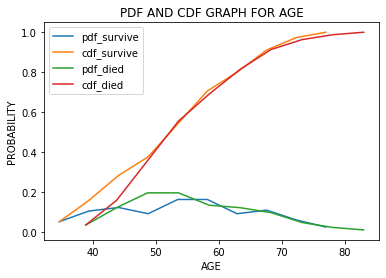

In [29]:
### pdf and cdf graph for age

c,bin=np.histogram(survive_df['age'],bins=10,density=True)
pdf=c/(sum(c))
cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_survive')
plt.plot(bin[1:],cdf,label='cdf_survive')

c,bin=np.histogram(died_df['age'],bins=10,density=True)
pdf=c/(sum(c))

print('pdf:',pdf)
print('bin:',bin)

cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_died')
plt.plot(bin[1:],cdf,label='cdf_died')

plt.xlabel('AGE')
plt.ylabel('PROBABILITY')
plt.title('PDF AND CDF GRAPH FOR AGE')
plt.legend()
plt.show()

## observation:
#1.pdf:
#   patients age between approx 45 to 56 are more chances of dies than survive.
#2.cdf:
#   patients age less than 45 have more probability of survive than dies. 

pdf: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
bin: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


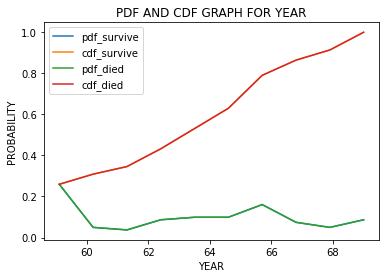

In [27]:
### pdf and cdf graph for year

C,bin=np.histogram(survive_df['year'],bins=10,density=True)
pdf=c/sum(c)
cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_survive')
plt.plot(bin[1:],cdf,label='cdf_survive')

c,bin=np.histogram(died_df['year'],bins=10,density=True)
pdf=c/sum(c)

print('pdf:',pdf)
print('bin:',bin)

cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_died')
plt.plot(bin[1:],cdf,label='cdf_died')

plt.xlabel('YEAR')
plt.ylabel('PROBABILITY')
plt.title('PDF AND CDF GRAPH FOR YEAR')
plt.legend()
plt.show()

## observation:
#1.pdf:
#patients operated in year of 1960 to 1965 have more chances of survive than died.
#patients operated in year of greater than 1965 have more chances of dies than survive.
#2.cdf:
#patients operated in year of 1961 to 1970 have more chances of survive than died.

pdf(survive): [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin(survive): [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf(dies): [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin(dies): [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


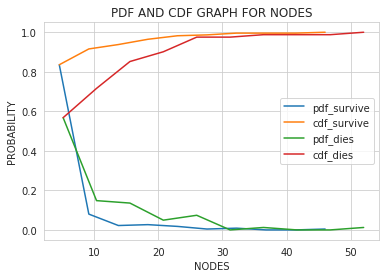

In [41]:
### pdf and cdf graph for nodes

c,bin=np.histogram(survive_df['nodes'],bins=10,density=True)
pdf=c/(sum(c))

print('pdf(survive):',pdf)
print('bin(survive):',bin)
cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_survive')
plt.plot(bin[1:],cdf,label='cdf_survive')


c,bin=np.histogram(died_df['nodes'],bins=10,density=True)
pdf=c/(sum(c))

print('pdf(dies):',pdf)
print('bin(dies):',bin)

cdf=np.cumsum(pdf)
plt.plot(bin[1:],pdf,label='pdf_dies')
plt.plot(bin[1:],cdf,label='cdf_dies')

plt.xlabel('NODES')
plt.ylabel('PROBABILITY')
plt.title('PDF AND CDF GRAPH FOR NODES')
plt.legend()
plt.show()

## observation:
#pdf:
#patients nodes present less than 5 have more probability of survive than dies.
#hence we conclude that pdf and cdf graph of age, year and nodes.nodes give useful result for determine survival status.

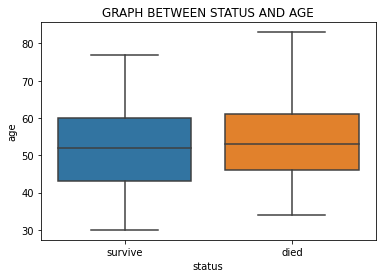

In [31]:
# box plot:

sns.boxplot(x='status',y='age',data=df)
plt.title('GRAPH BETWEEN STATUS AND AGE')
plt.show()

## observation:
#- patients age between 42 to 60 survive more than died.
#- patients age between 45 to 60 dies more than survive.
#- but there is much more overlapping between survive and died graph so we conclude that above graph does not giving useful result.

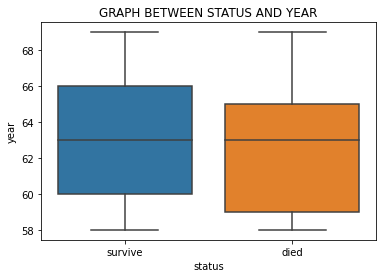

In [32]:
sns.boxplot(x='status',y='year',data=df)
plt.title('GRAPH BETWEEN STATUS AND YEAR')
plt.show()

## observation:
#- In obove graph overlapping is much more so we conclude that it also giving less useful result.

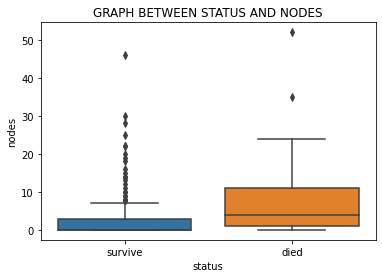

In [33]:
sns.boxplot(x='status',y='nodes',data=df)
plt.title('GRAPH BETWEEN STATUS AND NODES')
plt.show()

## observation:
#- there are 50% chances of patients survive than dies at nodes less than or equal to 0 between graph of survive and nodes.
#- there are 50% chances of patients dies than survive between nodes of 1 to 11(IQR)

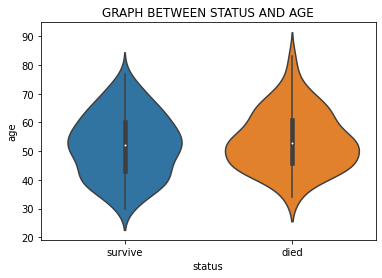

In [34]:
### voilin plot:

sns.violinplot(x='status',y='age',data=df)
plt.title('GRAPH BETWEEN STATUS AND AGE')
plt.show()

## observation:
#- because of overlapping between two graph we can't acheive useful result from this graph.

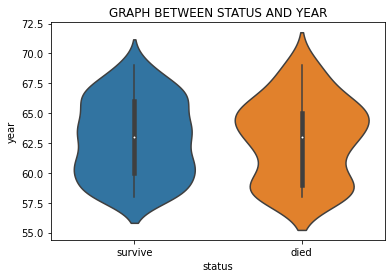

In [35]:
sns.violinplot(x='status',y='year',data=df)
plt.title('GRAPH BETWEEN STATUS AND YEAR')
plt.show()

## observation:
#- from this graph we can't achieve useful result bacause of overlapping between graph.

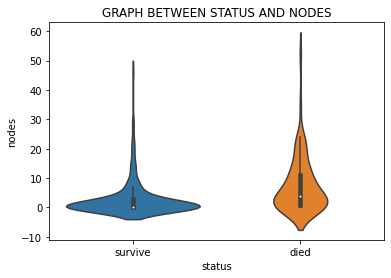

In [36]:
sns.violinplot(x='status',y='nodes',data=df)
plt.title('GRAPH BETWEEN STATUS AND NODES')
plt.show()

## observation:
#- 50% patients with nodes0 have more chances of survive more than 5 years.
#- 50% patients with nodes 1 to 11(IQR) have chances of dies more within 5 years.
#- hence out of all violinplot nodes giving useful result for better understanding of survival status.

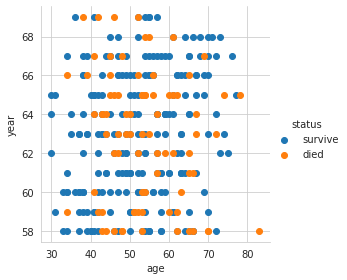

In [37]:
### BIVARIATE ANALYSIS:

### 2-D scatter plot:

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=4).map(plt.scatter,'age','year').add_legend()
plt.show()

## observation:
#- the above scatter plot does not giving a useful result between feature(age,year).


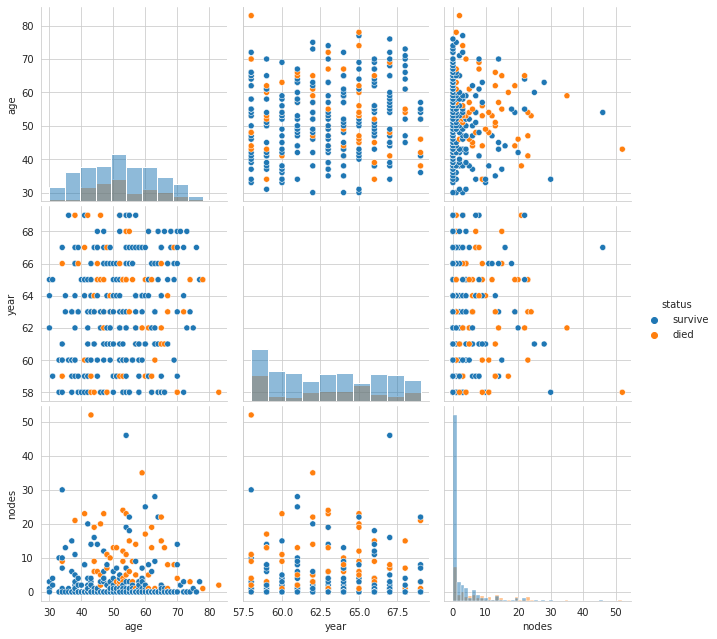

In [38]:
###pairplot:

sns.pairplot(df,hue='status',height=3,diag_kind='hist')

## observation:
#- from graph between age and nodes the age between 30 to 45 shows that patients with nodes less or equal to 0 have more chances of survive of more than 5 years.
#- except graph(age and nodes) all are having more overlapping so we can't get useful result from other graphs.

In [39]:
## CONCLUSION:
#- feature age and year does not give a useful result.
#- the dataset is imbalanced dataset as the number of survive and died datapoints are unequal.
#- feature nodes giving a useful result that is patients with nodes 0 or less than 0 have survive more than 5 years.